In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

In [12]:
np.random.seed(42)
n_samples = 100000
data = pd.DataFrame({
    'NE': np.random.choice(['Alta', 'Media', 'Baja'], size=n_samples, p=[0.6,0.3, 0.1]),
    'H': np.random.choice(['Alta', 'Media', 'Baja'], size=n_samples, p=[0.7, 0.2,0.1]),
    'S': np.random.choice(['Alta', 'Media', 'Baja'], size=n_samples, p=[0.8,0.1,0.1]),

    'EM': np.random.choice(['Sí', 'No'], size=n_samples, p=[0.01163, 0.98837])
})

In [13]:
data.loc[
    (data['NE'] == 'Alta') & (data['H'] == 'Alta') & (data['S'] == 'Alta'),
    'EM'
] = np.random.choice(
    ['Sí', 'No'],
    p=[0.3, 0.7],
    size=len(data[(data['NE'] == 'Alta') & (data['H'] == 'Alta') & (data['S'] == 'Alta')])
)

data.loc[
    ((data['NE'] == 'Alta') & (data['H'] == 'Alta')) |
    ((data['NE'] == 'Alta') & (data['S'] == 'Alta')) |
    ((data['H'] == 'Alta') & (data['S'] == 'Alta')),
    'EM'
] = np.random.choice(
    ['Sí', 'No'],
    p=[0.7, 0.3],
    size=len(data[
        ((data['NE'] == 'Alta') & (data['H'] == 'Alta')) |
        ((data['NE'] == 'Alta') & (data['S'] == 'Alta')) |
        ((data['H'] == 'Alta') & (data['S'] == 'Alta'))
    ])
)

data.loc[
    ((data['NE'] == 'Alta') & (data['H'] == 'Media')) |
    ((data['H'] == 'Alta') & (data['S'] == 'Media')) |
    ((data['S'] == 'Alta') & (data['NE'] == 'Media')),
    'EM'
] = np.random.choice(
    ['Sí', 'No'],
    p=[0.4, 0.6],
    size=len(data[
        ((data['NE'] == 'Alta') & (data['H'] == 'Media')) |
        ((data['H'] == 'Alta') & (data['S'] == 'Media')) |
        ((data['S'] == 'Alta') & (data['NE'] == 'Media'))
    ])
)

data.loc[
    (data['NE'] == 'Media') & (data['H'] == 'Media') & (data['S'] == 'Media'),
    'EM'
] = np.random.choice(
    ['Sí', 'No'],
    p=[0.6, 0.4],
    size=len(data[
        (data['NE'] == 'Media') & (data['H'] == 'Media') & (data['S'] == 'Media')
    ])
)

data.loc[
    (data['NE'] == 'Baja') | (data['H'] == 'Baja') | (data['S'] == 'Baja'),
    'EM'
] = np.random.choice(
    ['Sí', 'No'],
    p=[0.2, 0.8],
    size=len(data[
        (data['NE'] == 'Baja') | (data['H'] == 'Baja') | (data['S'] == 'Baja')
    ])
)

data.loc[
    (data['NE'] == 'Baja') & (data['H'] == 'Baja') & (data['S'] == 'Baja'),
    'EM'
] = np.random.choice(
    ['Sí', 'No'],
    p=[0.5, 0.5],
    size=len(data[
        (data['NE'] == 'Baja') & (data['H'] == 'Baja') & (data['S'] == 'Baja')
    ])
)

In [14]:
encoder = OrdinalEncoder()
X = encoder.fit_transform(data[['NE', 'H','S']])
y = data['EM'].map({'No': 0, 'Sí': 1})

In [15]:
model = CategoricalNB()
model.fit(X, y)

combinations = pd.DataFrame({
    'NE': ['Alta', 'Alta', 'Media', 'Baja'],
    'H':  ['Alta', 'Media', 'Media', 'Baja'],
    'S':  ['Alta', 'Alta', 'Media', 'Baja']
})

X_new = encoder.transform(combinations)

probs = model.predict_proba(X_new)

In [16]:
combinations['P(EM = No)'] = probs[:, 0]
combinations['P(EM = Sí)'] = probs[:, 1]

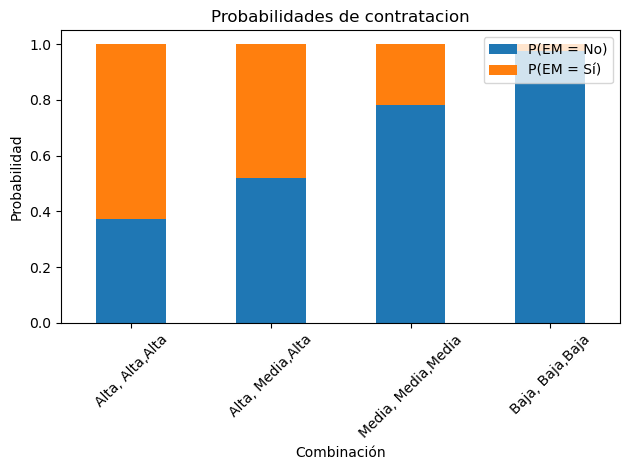

In [17]:
# Combine 'Contaminación' and 'Fumador' into a single label for the x-axis
combinations['Etiqueta'] = combinations.apply(lambda row: f"{row['NE']}, {row['H']},{row['S']}", axis=1)

# Plot the probabilities
combinations.plot(x='Etiqueta', y=['P(EM = No)', 'P(EM = Sí)'], kind='bar', stacked=True)
plt.title('Probabilidades de contratacion')
plt.xlabel('Combinación')
plt.ylabel('Probabilidad')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Save the plot
plt.savefig('probabilidades_condicionales_contratacion_naive_bayes.png')
